chemical accuracy reached for 0
Mean: -7.8316637340198305
Mean error: 0.01321535899016831
Std lower: 0.00308872287941922
Std upper: 0.023669364746853105


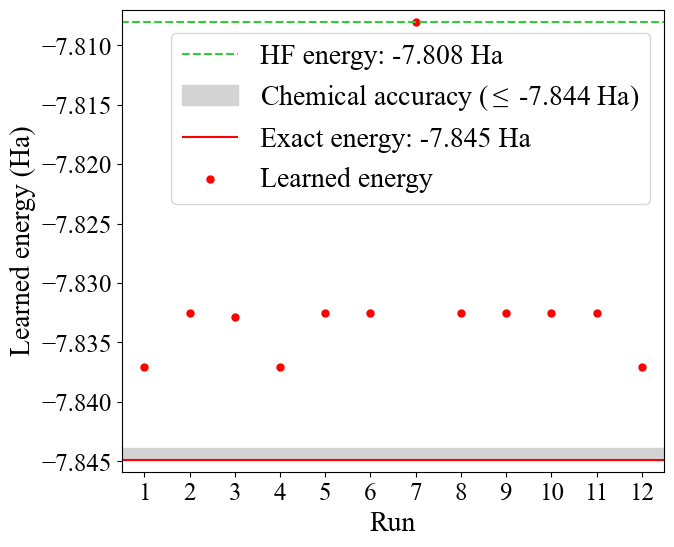

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    'font.size': 20,
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold'
})

plt.figure(figsize=(7, 6))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

chemical_accuracy = 0.001
exact_energy = -7.84487909301
hf_energy = -7.808

learned_energies = []
for session in range(12):
    results = np.load(f'training_session_{session}/results_{session}.npy', allow_pickle=True)
    energy = np.real(np.array(results)[:, 1])
    evaluation = np.array(results)[:, 2]
    mask_true = np.where(evaluation)[0]
    learned_energies.append(energy[mask_true][-1])

x = np.arange(1, 13)
d = plt.scatter(x, learned_energies, s=25, color='red', label="Learned energy")
plt.xticks(x)
plt.xlabel('Run', fontsize=20)
plt.ylabel('Learned energy (Ha)', fontsize=20)
plt.ylim(exact_energy - 0.001, hf_energy + 0.001)

a = plt.hlines(hf_energy, 0, 13, color='limegreen', linestyles="--", label=f'HF energy: {hf_energy:.3f} Ha')
c = plt.fill_between([0, 13], exact_energy, exact_energy + chemical_accuracy, color='lightgrey', alpha=1,
                     label=f"Chemical accuracy ($\\leq$ {exact_energy + chemical_accuracy:.3f} Ha)", zorder=-2)
b = plt.hlines(exact_energy, 0, 13, color='red', label=f'Exact energy: {exact_energy:.3f} Ha')

plt.legend(handles=[a, c, b, d], loc='upper right', bbox_to_anchor=(1.0, 0.98), ncol=1, fontsize=20)
plt.xlim(0.5, 12.5)
plt.savefig("Learned_energies_overview.png", dpi=300, bbox_inches='tight')

ca_count = sum(e < exact_energy + chemical_accuracy for e in learned_energies)
mean = np.mean(learned_energies)
upper = [e for e in learned_energies if e > mean]
lower = [e for e in learned_energies if e < mean]
def safe_sigma(arr, mean):
    n = len(arr)
    if n == 0:
        return 0.0
    elif n == 1:
        return float(np.abs(arr[0] - mean))
    else:
        return np.sqrt(np.sum((np.array(arr) - mean) ** 2) / (n - 1))

sigma_plus = safe_sigma(upper, mean)
sigma_minus = safe_sigma([mean - x for x in lower], 0.0)
errors = np.array(learned_energies) - exact_energy

print("chemical accuracy reached for", ca_count)
print("Mean:", mean)
print("Mean error:", np.mean(errors))
print("Std lower:", sigma_minus)
print("Std upper:", sigma_plus)



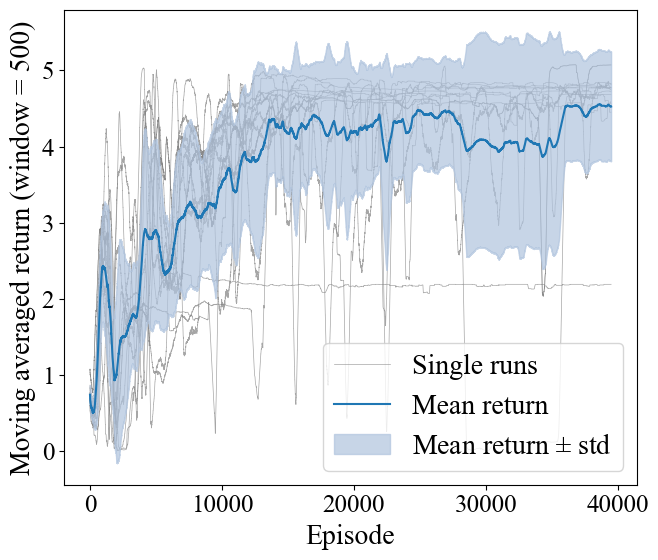

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    'font.size': 20,
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold'
})

plt.figure(figsize=(7, 6))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

all_rewards = []

for session in range(12):
    results = np.load(f'training_session_{session}/results_{session}.npy', allow_pickle=True)
    reward = np.array(list(zip(*results))[3])
    rewardsum = np.array([np.mean(reward[i:i + 500]) for i in range(len(reward) - 500)])
    all_rewards.append(rewardsum)
    plt.plot(rewardsum, color='gray', linewidth=0.5, alpha=0.7, zorder=-5)

plt.plot(rewardsum, color='gray', linewidth=0.5, alpha=0.7, zorder=-5, label="Single runs")

mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

plt.plot(mean_rewards, linewidth=1.5, label='Mean return', zorder=2)
plt.fill_between(range(len(mean_rewards)), mean_rewards - std_rewards, mean_rewards + std_rewards,
                 color="lightsteelblue", alpha=0.7, label="Mean return $\pm$ std", zorder=1)

plt.xlabel('Episode', fontsize=20)
plt.ylabel('Moving averaged return (window = 500)', fontsize=20)
plt.legend(loc='lower right', fontsize=20)

plt.tight_layout()
plt.savefig("Averaged_return.png", dpi=300, bbox_inches='tight')
plt.show()


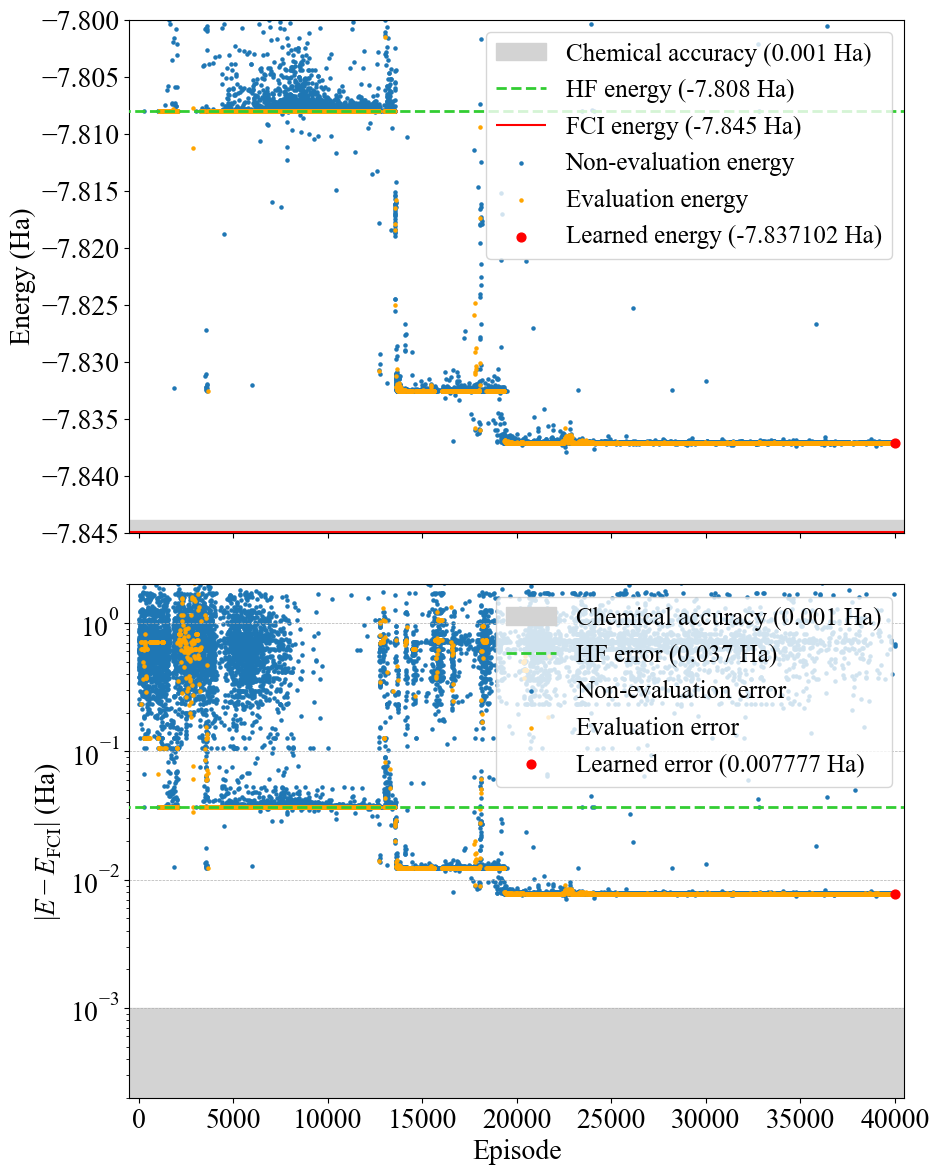

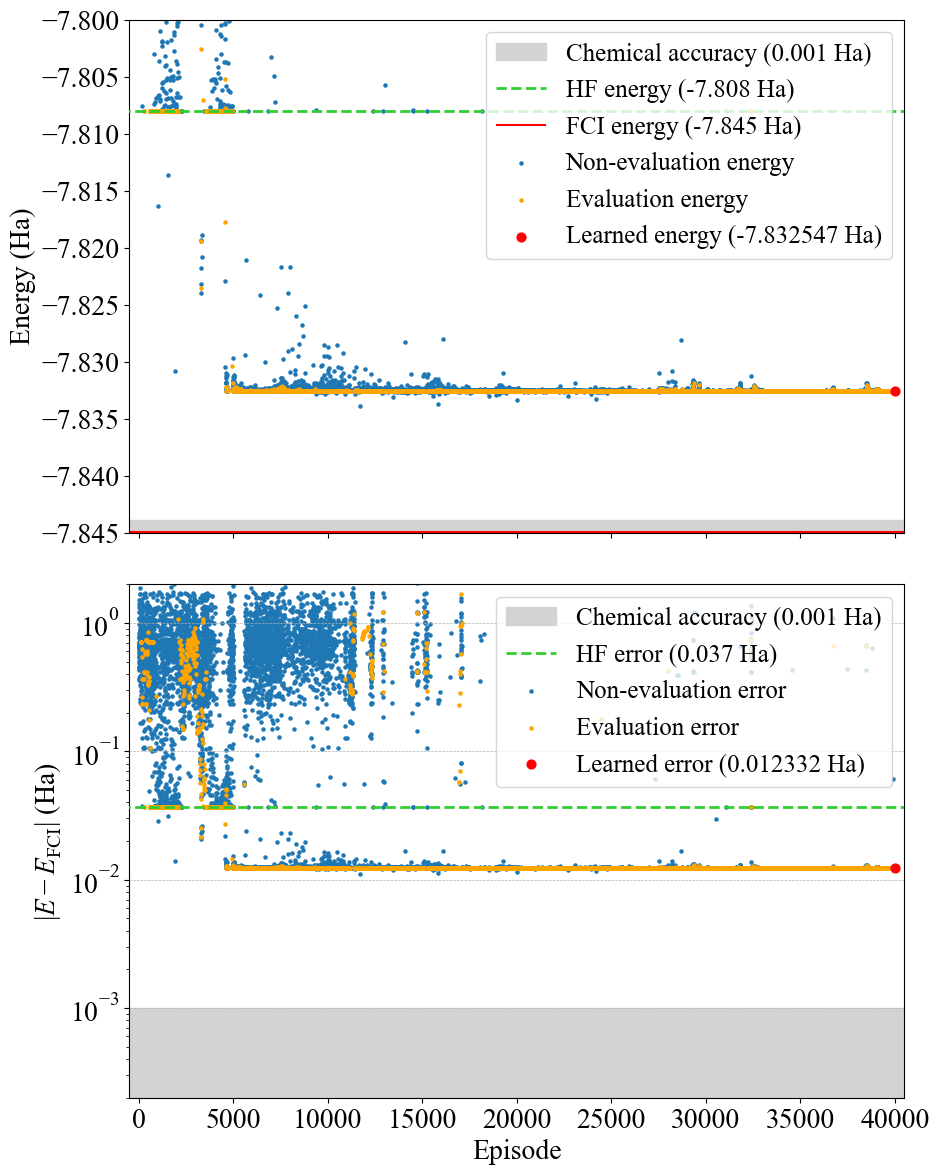

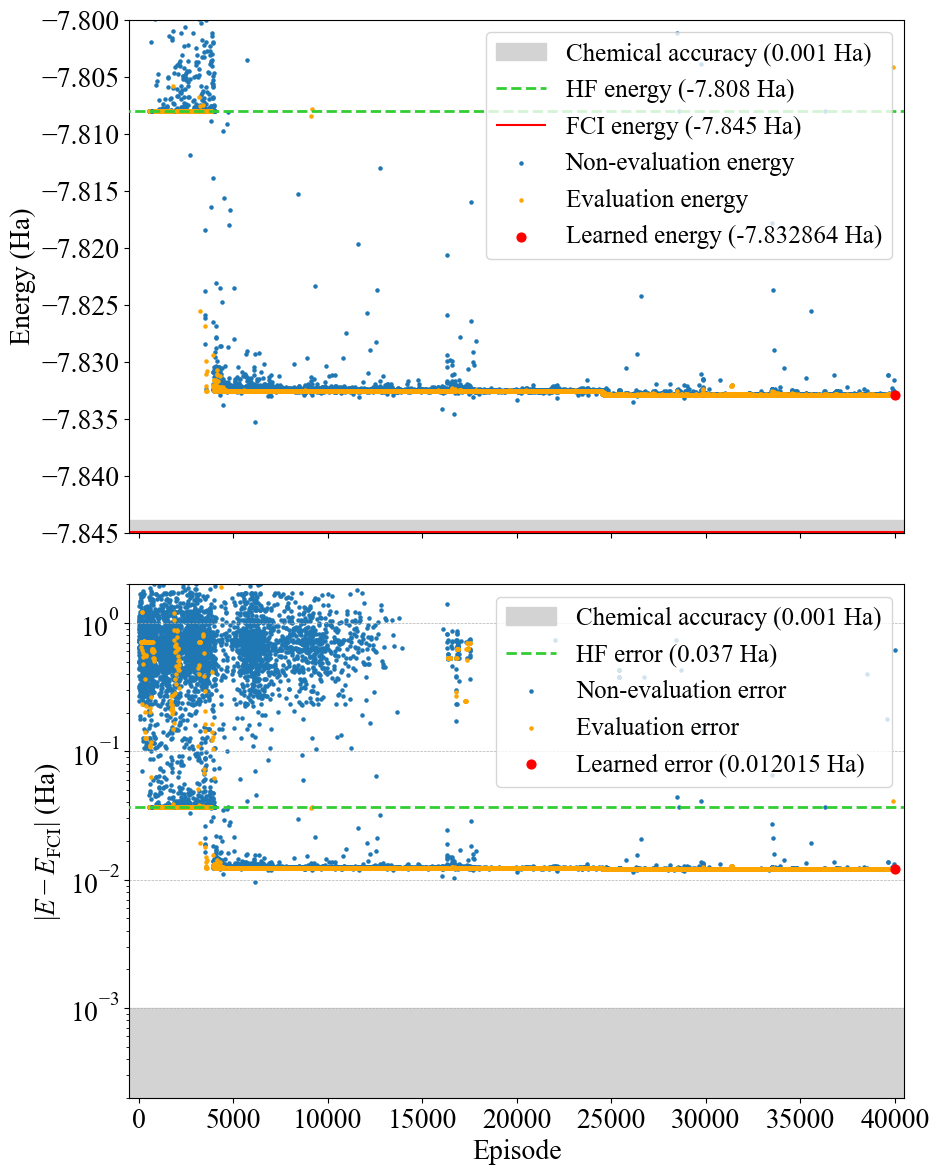

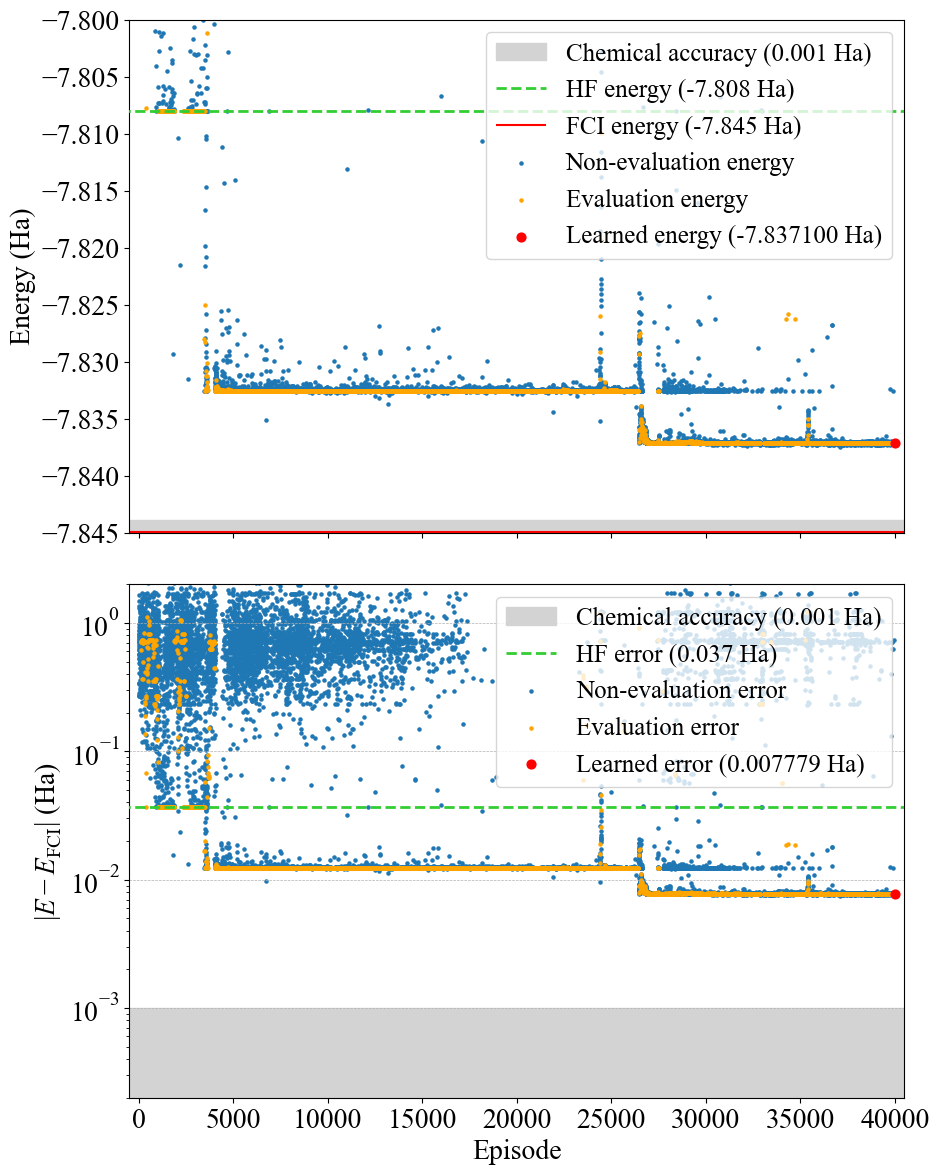

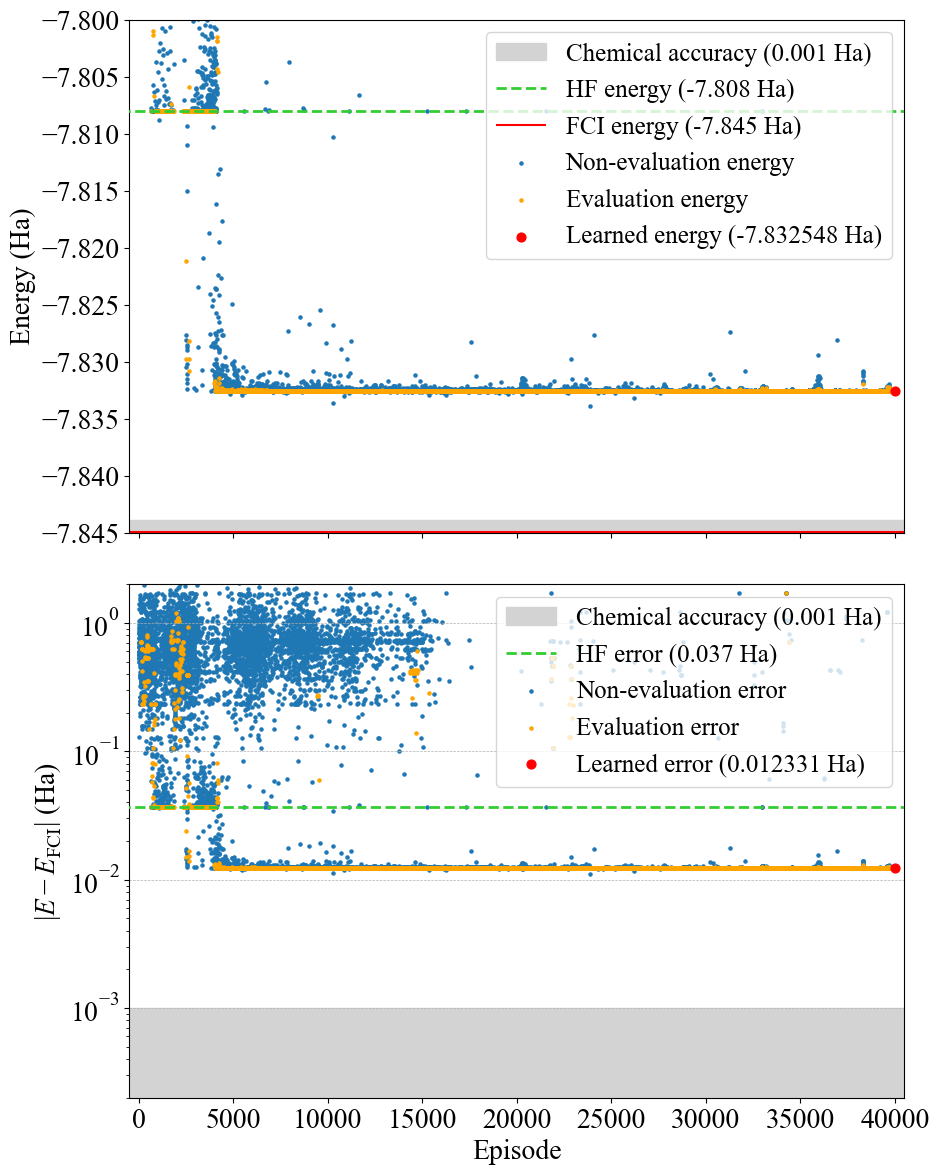

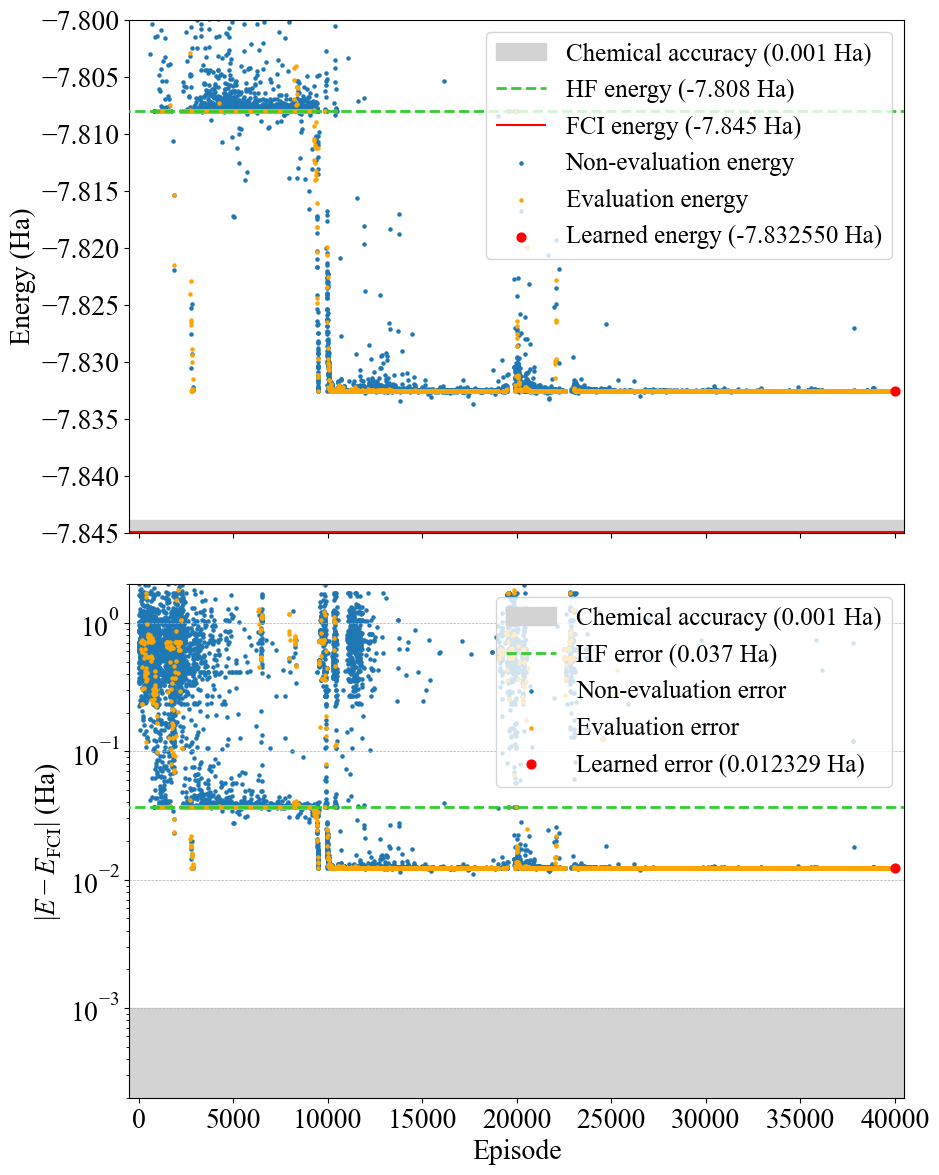

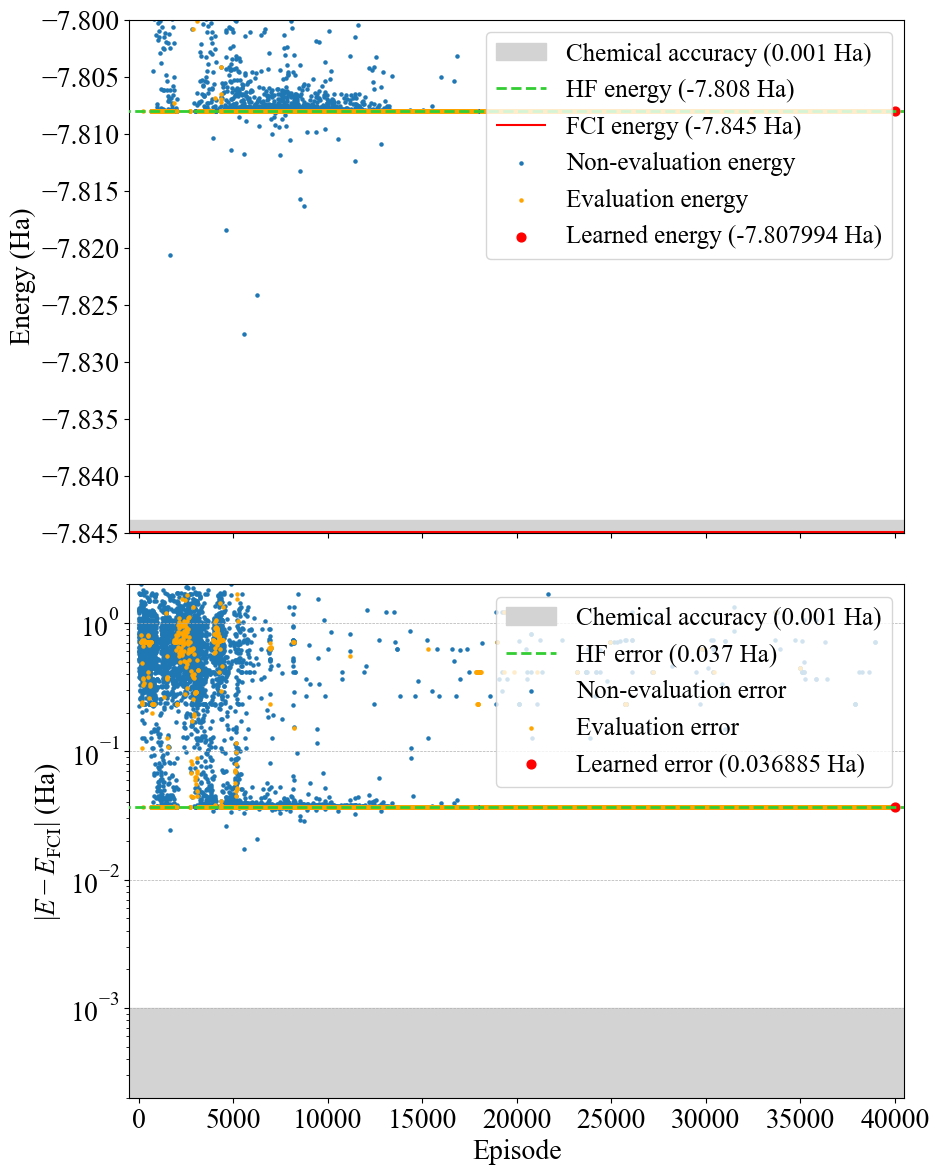

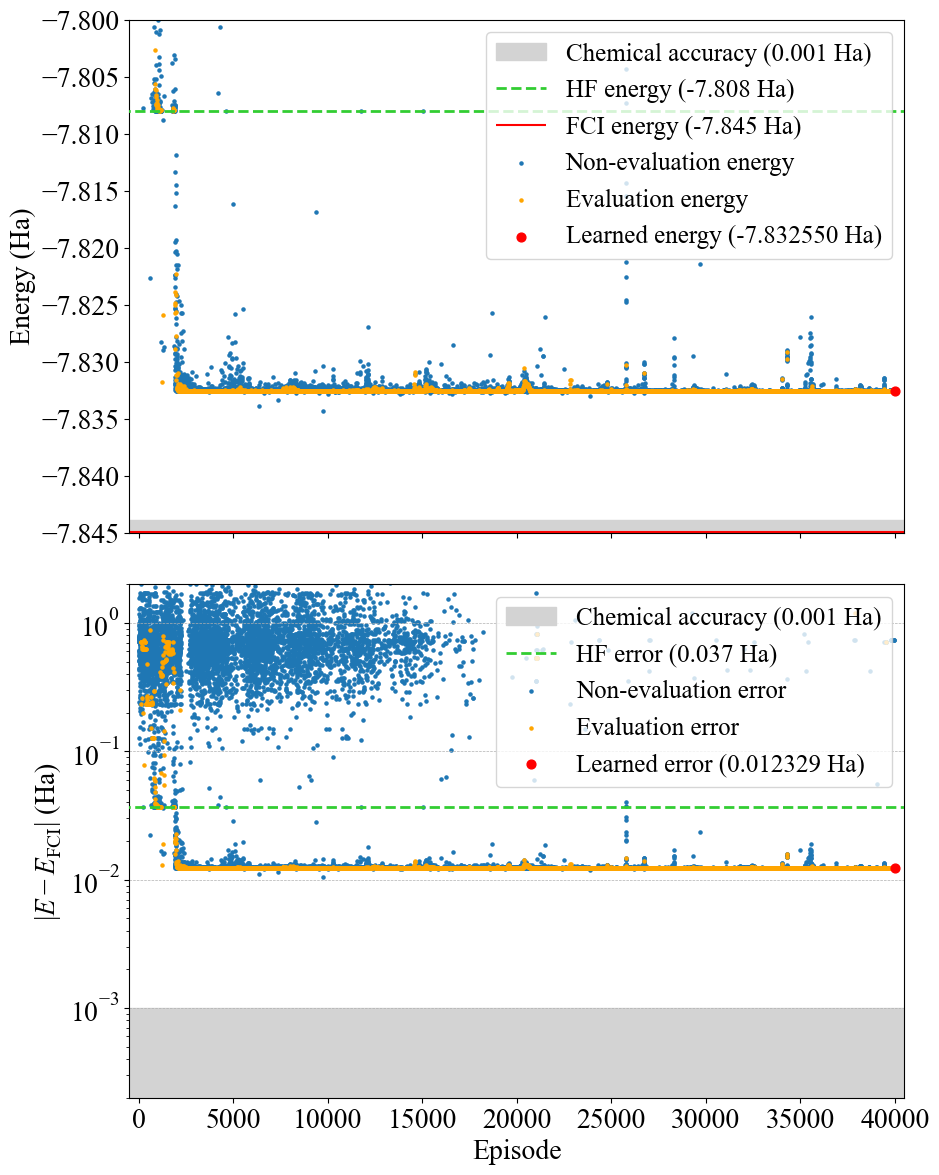

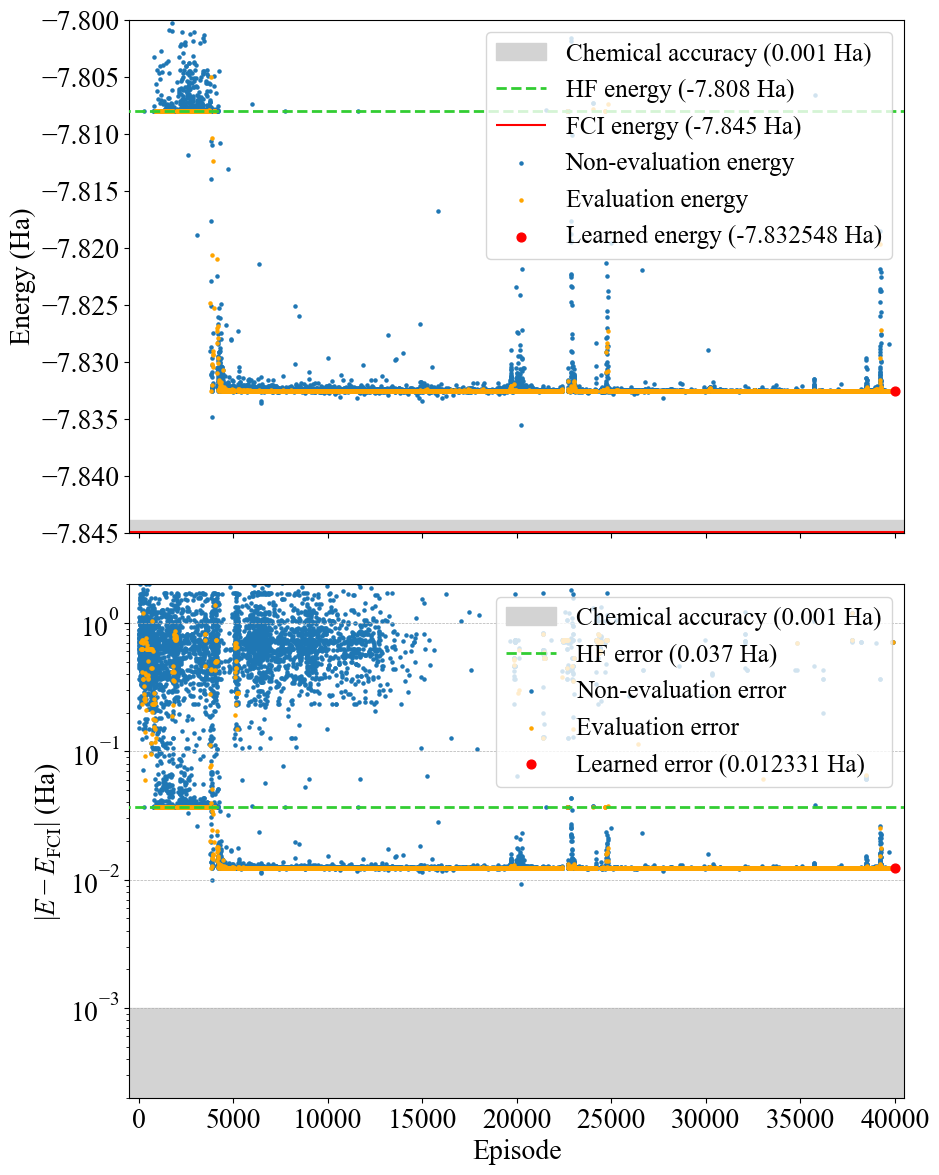

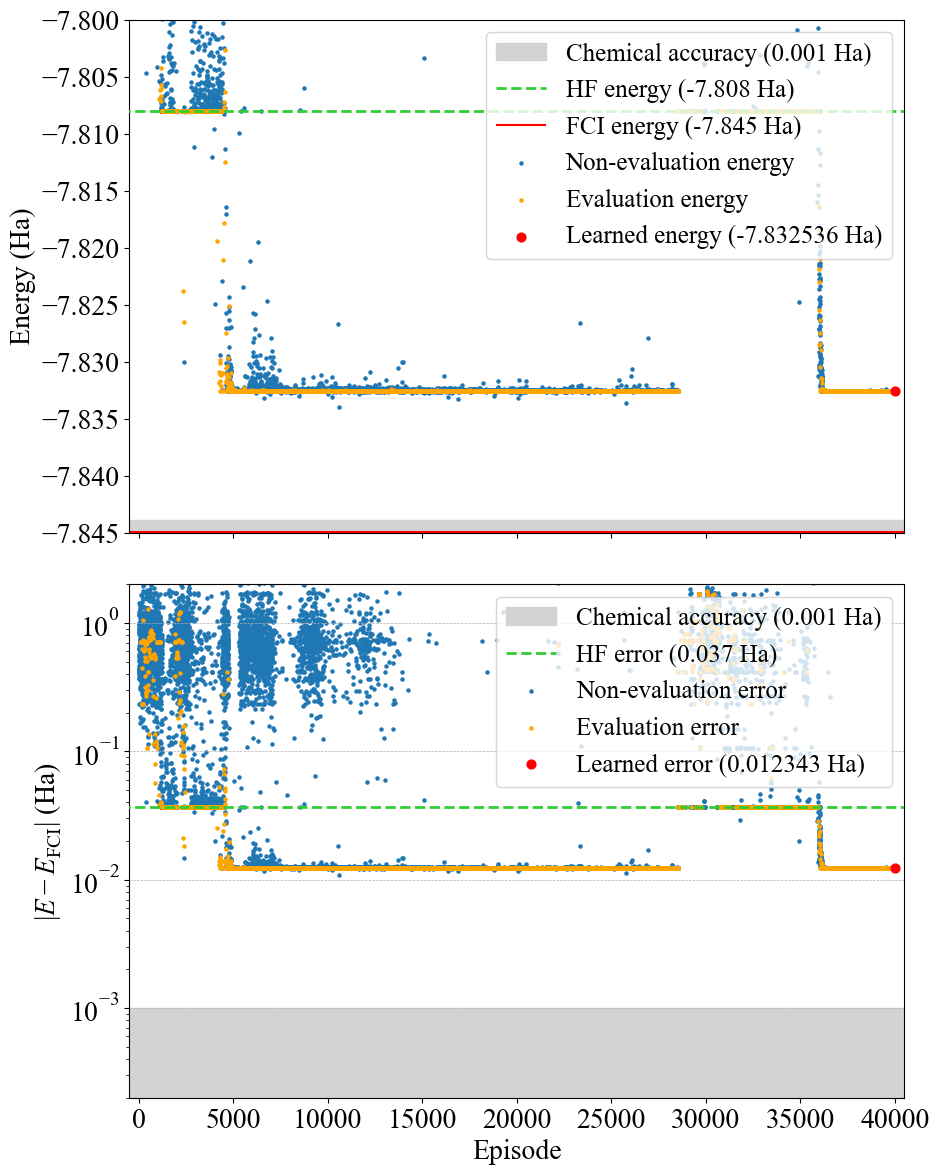

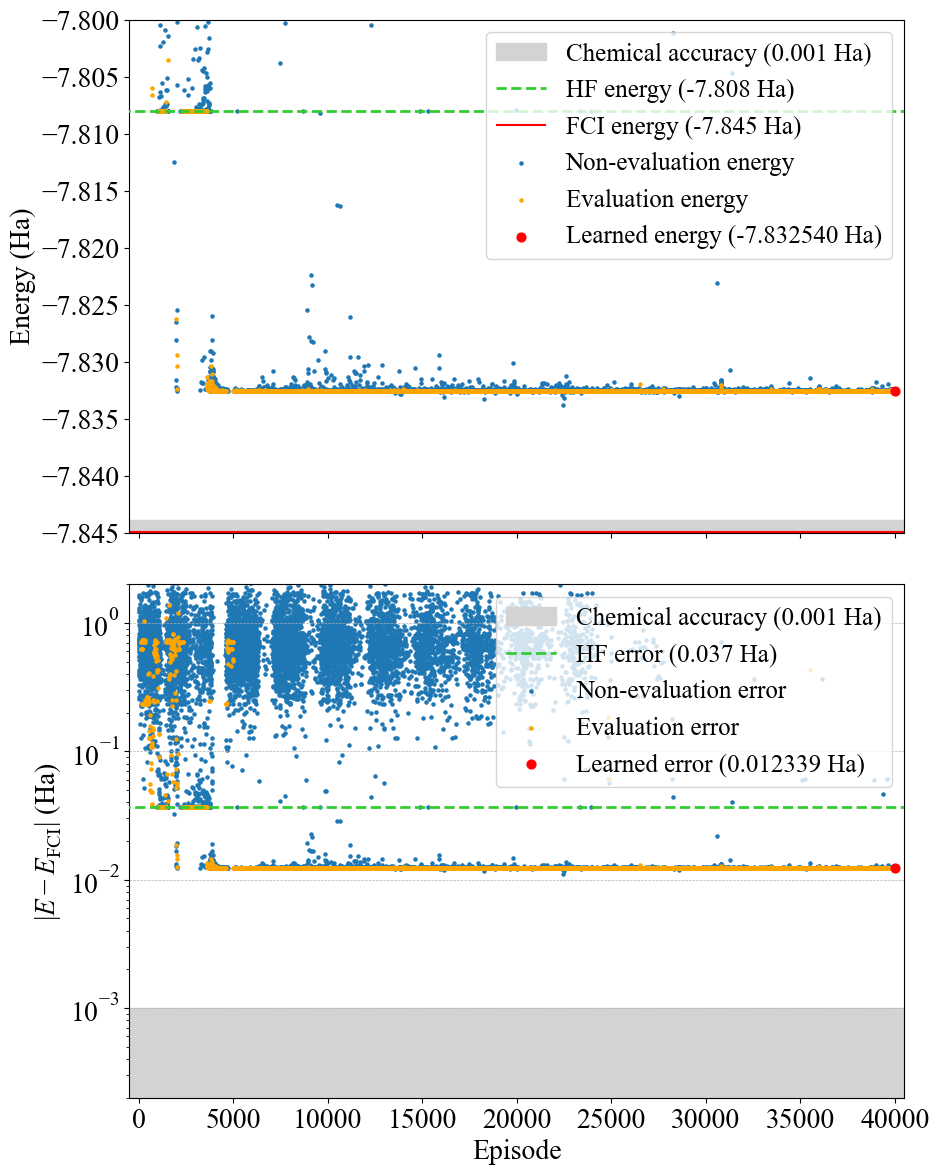

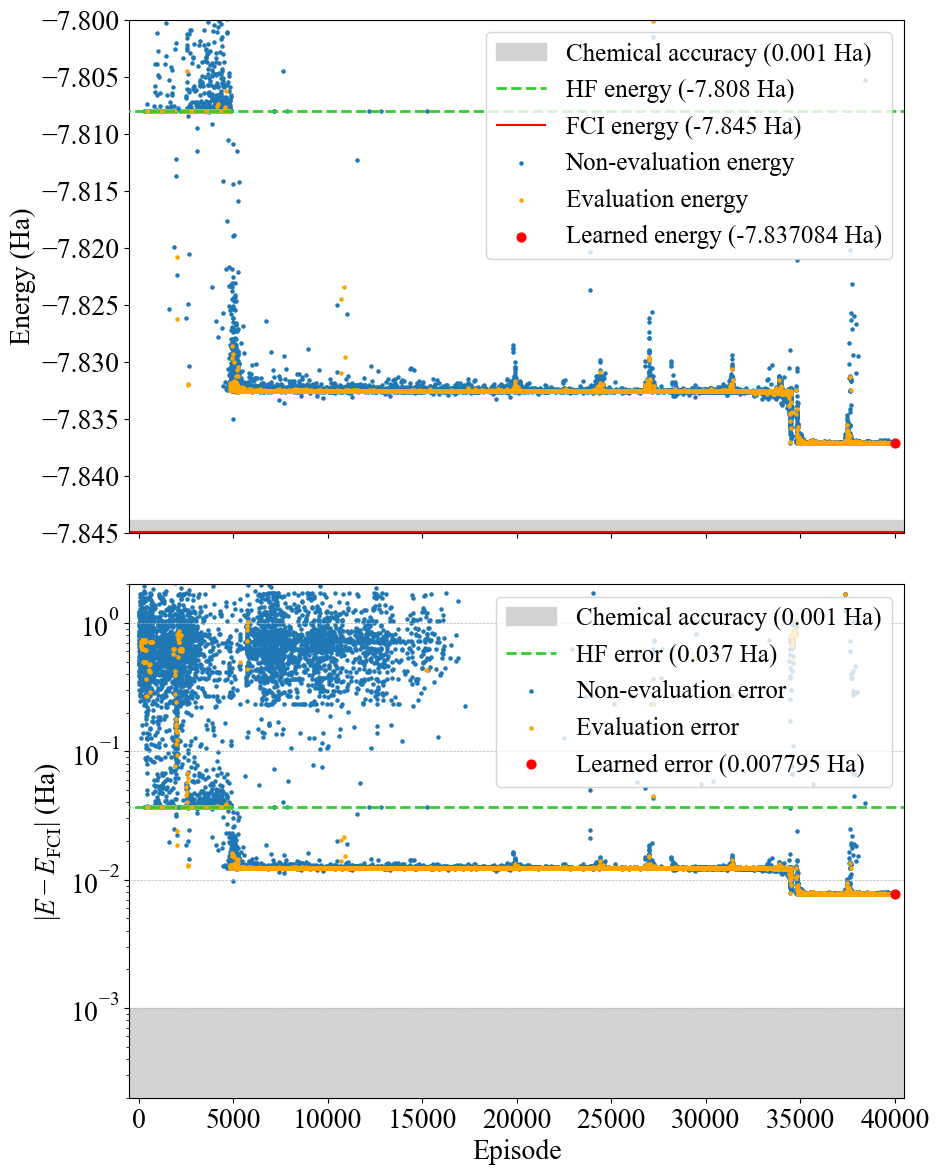

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


exact_energy = -7.84487909301
hf_energy = -7.80799
chemical_accuracy = 0.001

# Fonts 
rcParams.update({
    'font.size': 20,
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold'
})

for session in range(12):  
    results = np.load(f'training_session_{session}/results_{session}.npy', allow_pickle=True)
    episode = np.array(list(zip(*results))[0])
    energy = np.real(np.array(list(zip(*results))[1]))
    evaluation = np.array(list(zip(*results))[2], dtype=bool)

    mask_true = np.where(evaluation)[0]
    mask_false = np.where(~evaluation)[0]
    start, end = episode.min(), episode.max()

    error = np.abs(energy - exact_energy)
    hf_error = abs(hf_energy - exact_energy)

    fig, (ax1, ax2) = plt.subplots(
        nrows=2, sharex=True, figsize=(10, 14),
        gridspec_kw={'hspace': 0.1}
    )

    # --- Energy plot ---
    ax1.fill_between([start - 1000, end + 1000], -100,
                     exact_energy + chemical_accuracy,
                     color='lightgrey', alpha=1,
                     label="Chemical accuracy (0.001 Ha)", zorder=-2)
    ax1.hlines(hf_energy, start - 1000, end + 1000,
               color='limegreen', linestyle="--", linewidth=2,
               label=f'HF energy ({hf_energy:.3f} Ha)', zorder=5)
    ax1.hlines(exact_energy, start - 1000, end + 1000,
               color='red', linewidth=1.5,
               label=f'FCI energy ({exact_energy:.3f} Ha)', zorder=-1)
    ax1.scatter(mask_false, energy[mask_false], s=5,
                label='Non-evaluation energy', color='#1f77b4', zorder=0)
    ax1.scatter(mask_true, energy[mask_true], s=5,
                label='Evaluation energy', color='orange', zorder=1)
    ax1.scatter(mask_true[-1], energy[mask_true][-1], s=40,
                color='red', zorder=3,
                label=f'Learned energy ({energy[mask_true][-1]:.6f} Ha)')
    ax1.set_ylabel('Energy (Ha)')
    ax1.set_ylim(-7.845, -7.8)
    ax1.legend(loc='upper right', fontsize=18)

    # --- Error plot ---
    ax2.fill_between([start - 1000, end + 1000], 0, chemical_accuracy,
                     color='lightgrey', alpha=1,
                     label="Chemical accuracy (0.001 Ha)", zorder=-2)
    ax2.hlines(hf_error, start - 1000, end + 1000,
               color='limegreen', linestyle="--", linewidth=2,
               label=f'HF error ({hf_error:.3f} Ha)', zorder=5)
    ax2.scatter(mask_false, error[mask_false], s=5,
                label='Non-evaluation error', color='#1f77b4', zorder=0)
    ax2.scatter(mask_true, error[mask_true], s=5,
                label='Evaluation error', color='orange', zorder=1)
    ax2.scatter(mask_true[-1], error[mask_true][-1], s=40,
                color='red', zorder=3,
                label=f'Learned error ({error[mask_true][-1]:.6f} Ha)')
    ax2.set_yscale("log")
    ax2.grid(True, axis='y', linestyle="--", linewidth=0.5)
    ax2.set_ylabel(r"$|E - E_{\mathrm{FCI}}|$ (Ha)")
    ax2.set_xlabel("Episode")
    ax2.set_ylim(2e-4, 2)
    ax2.legend(loc='upper right', fontsize=18)

    ax2.set_xlim(start - 500, end + 500)

    plt.savefig(f'energy_error_plot_{session}.png', bbox_inches='tight')
    plt.show()


Session 0: Final energy -7.837102 Ha
-0.9785|001001> -0.0910|010100> +0.1840|100100> +0.0171|111001> 


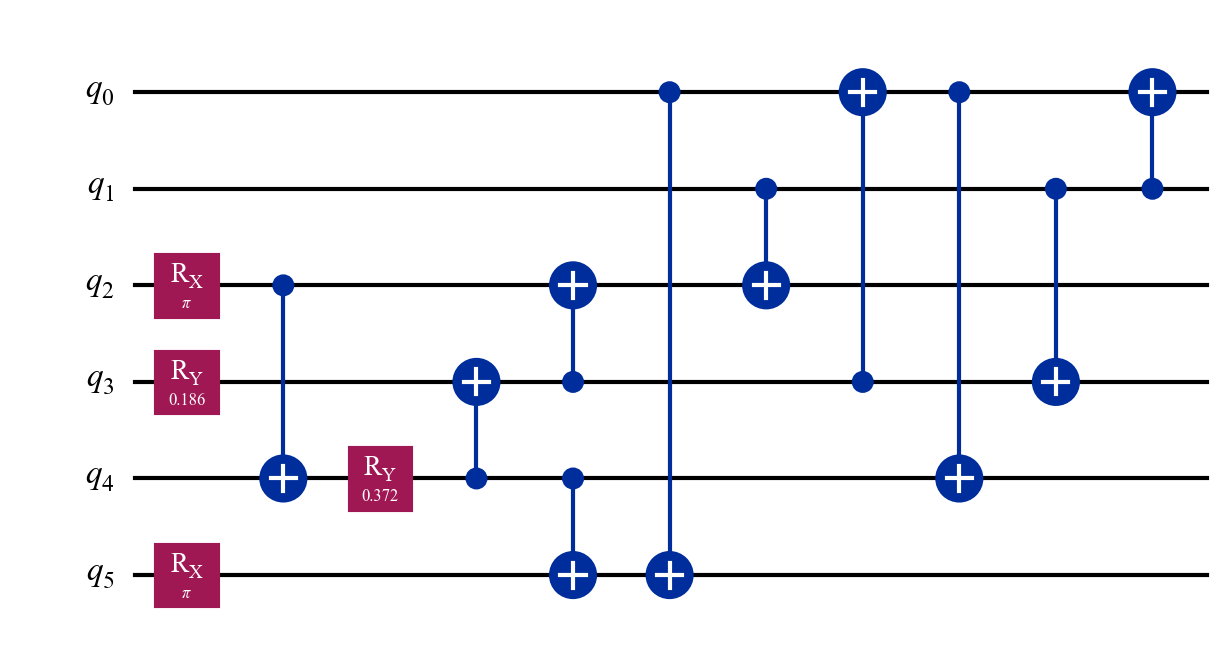

Session 1: Final energy -7.832547 Ha
-0.9833|001001> +0.1819|100100> 


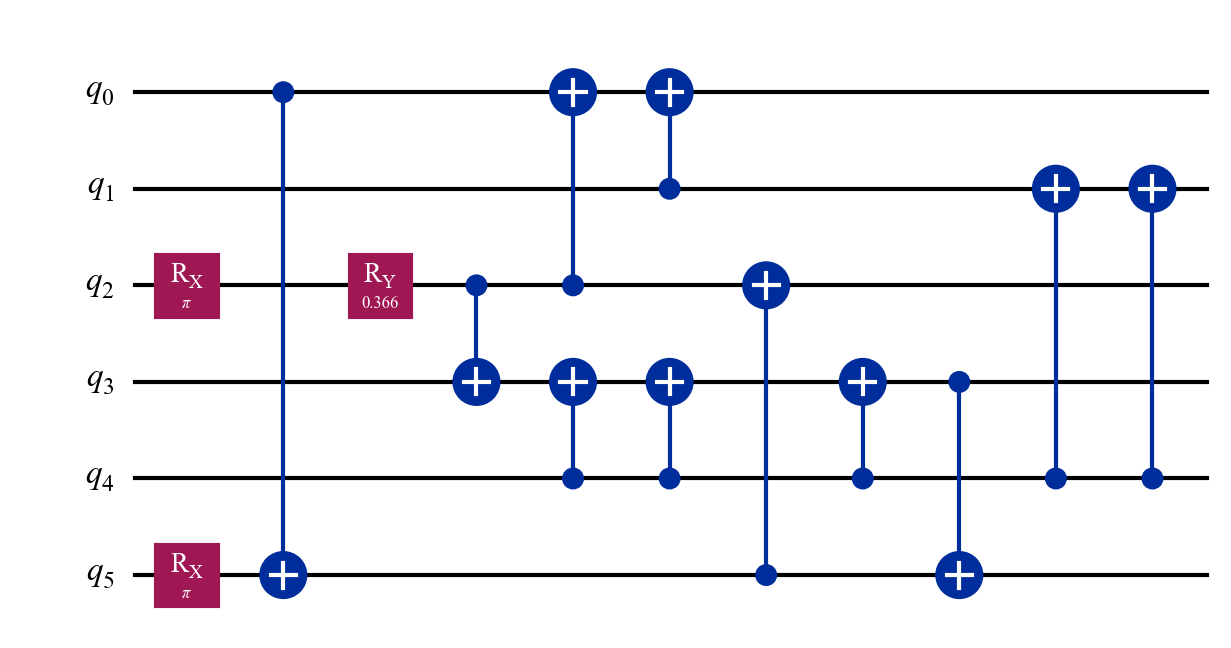

Session 2: Final energy -7.832864 Ha
-0.9812|001001> +0.0424|001010> +0.1883|100100> -0.0081|100111> 


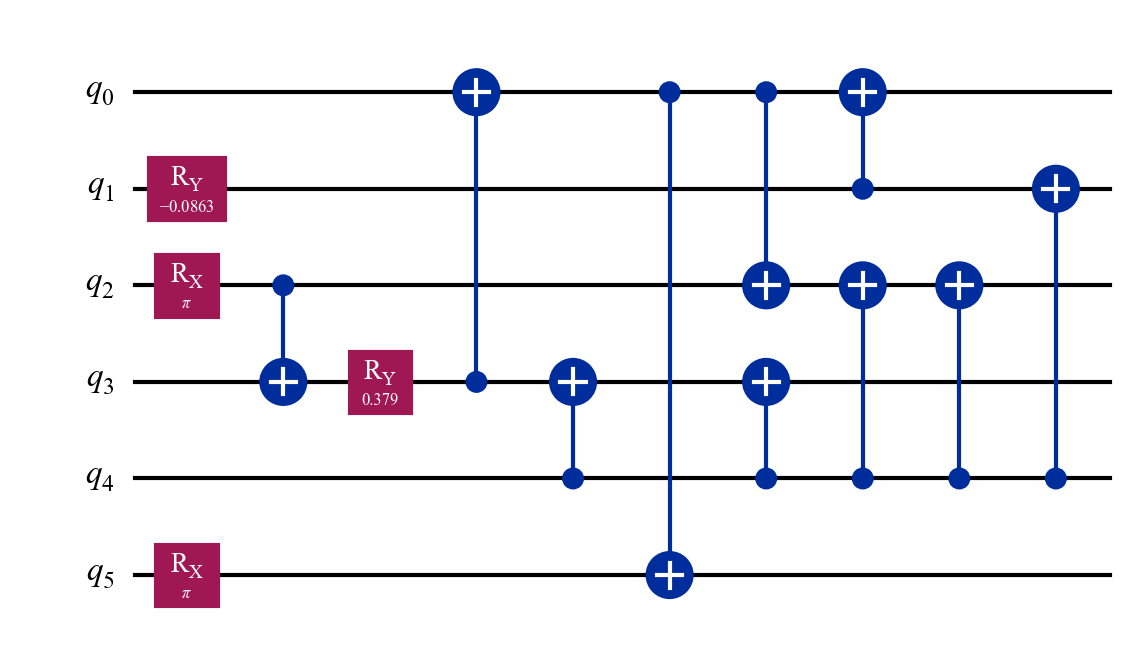

Session 3: Final energy -7.837100 Ha
-0.9783|001001> -0.0174|001111> -0.0919|100010> +0.1851|100100> 


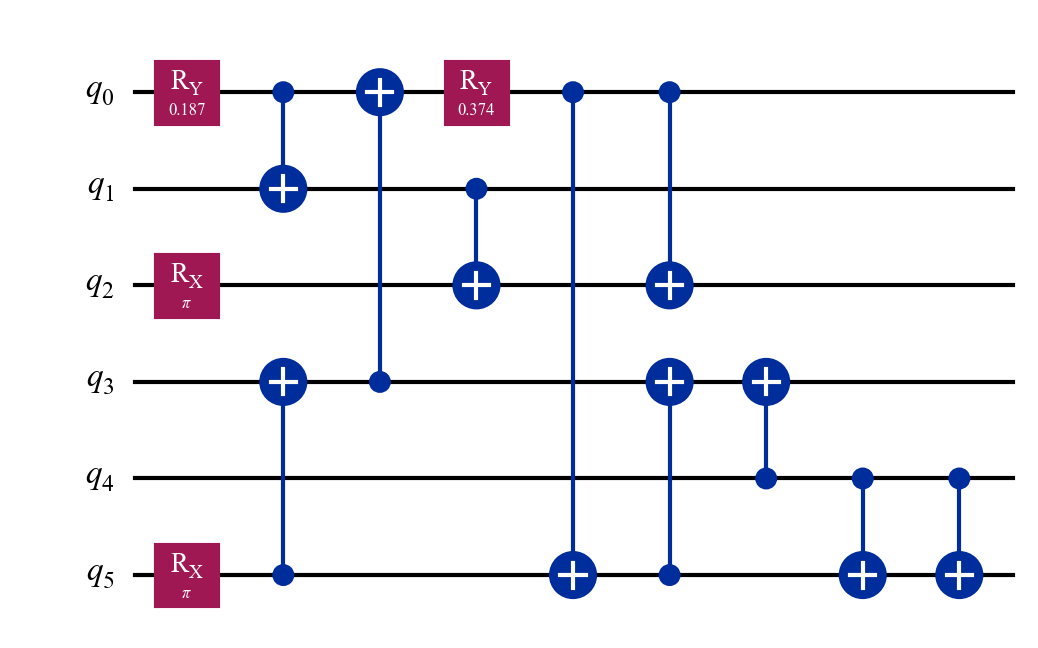

Session 4: Final energy -7.832548 Ha
-0.9826|001001> +0.1856|100100> 


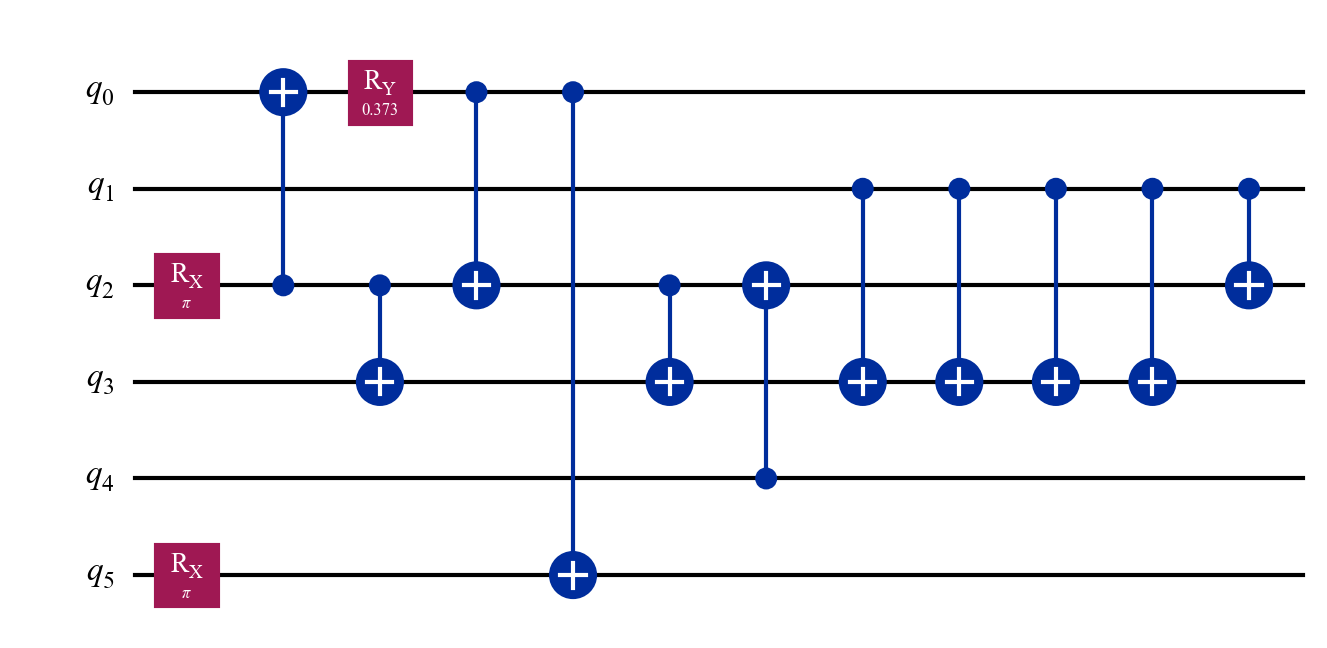

Session 5: Final energy -7.832550 Ha
-0.9829|001001> +0.1841|100100> 


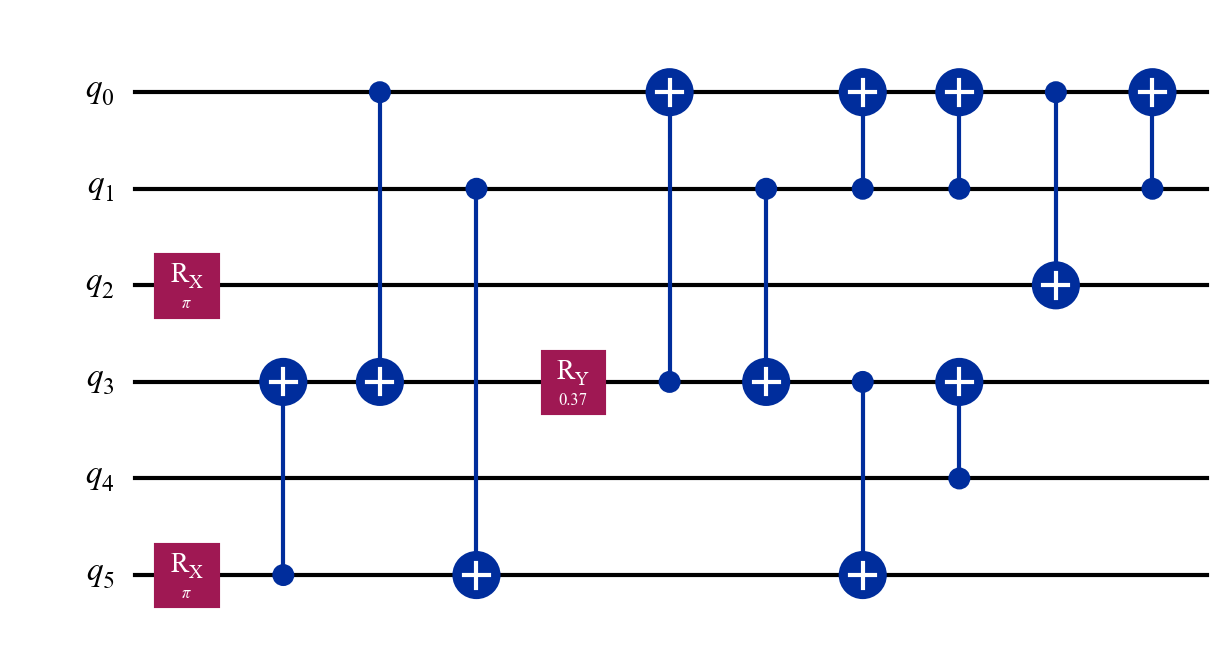

Session 6: Final energy -7.807994 Ha
-1.0000|001001> 


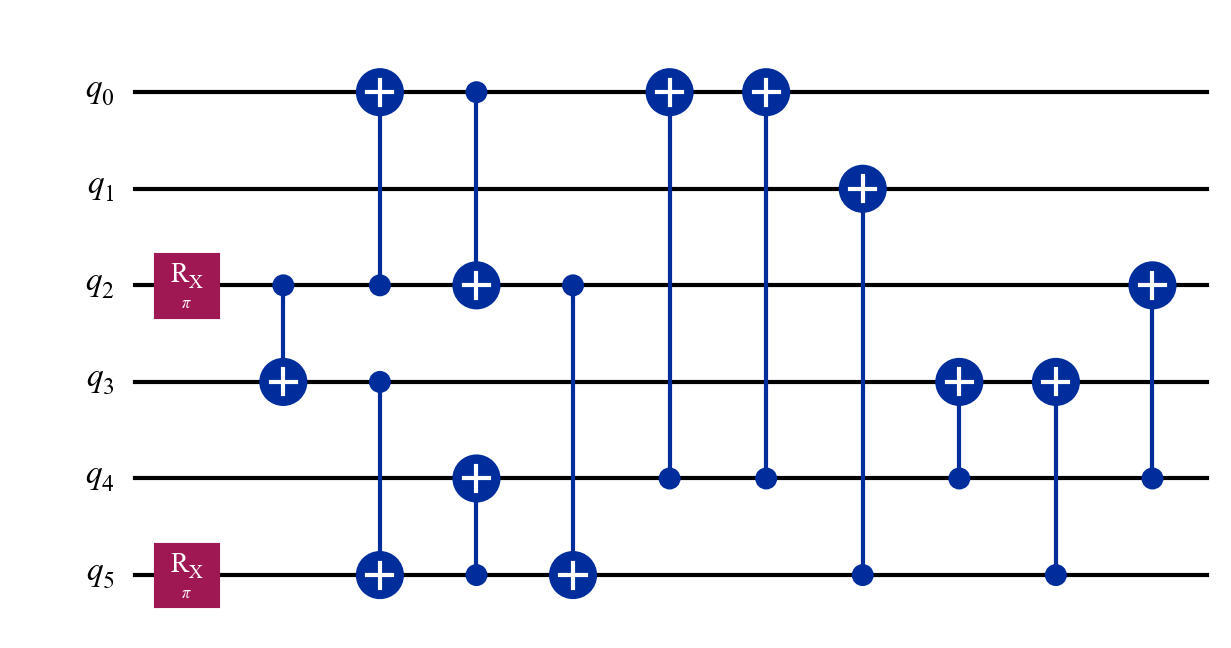

Session 7: Final energy -7.832550 Ha
-0.0001|000100> +0.9828|001001> -0.1844|100100> -0.0003|101001> 


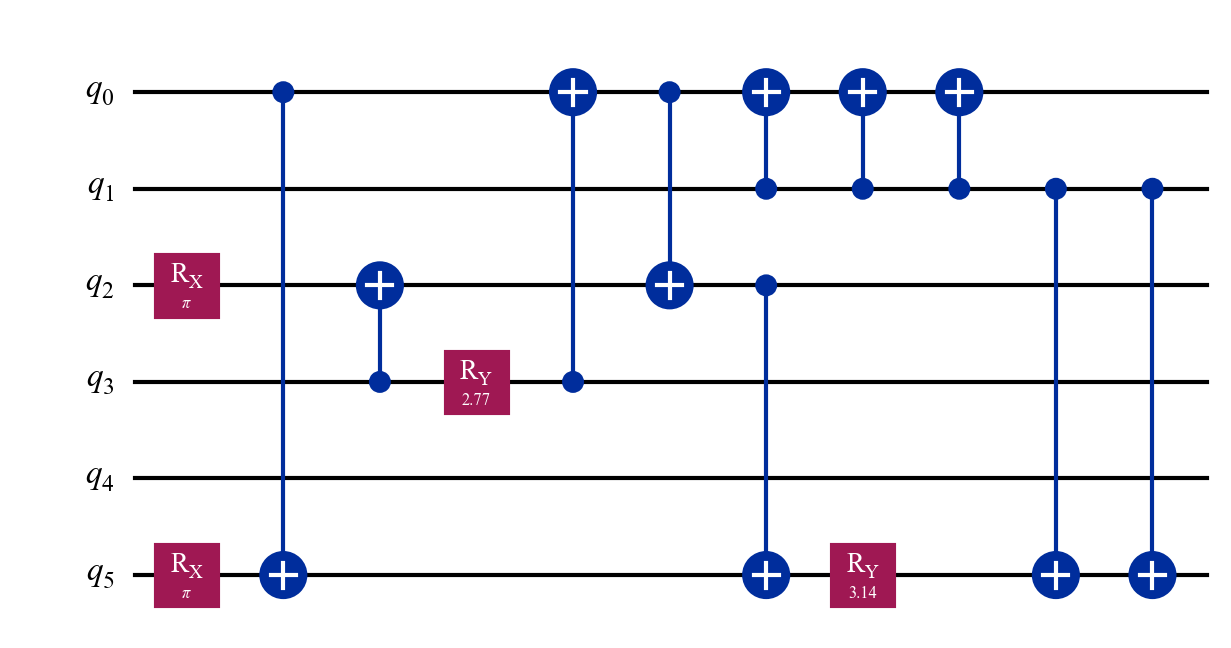

Session 8: Final energy -7.832548 Ha
+0.9833e^(+0.5005πi)|001001> +0.1822e^(-0.4995πi)|100100> 


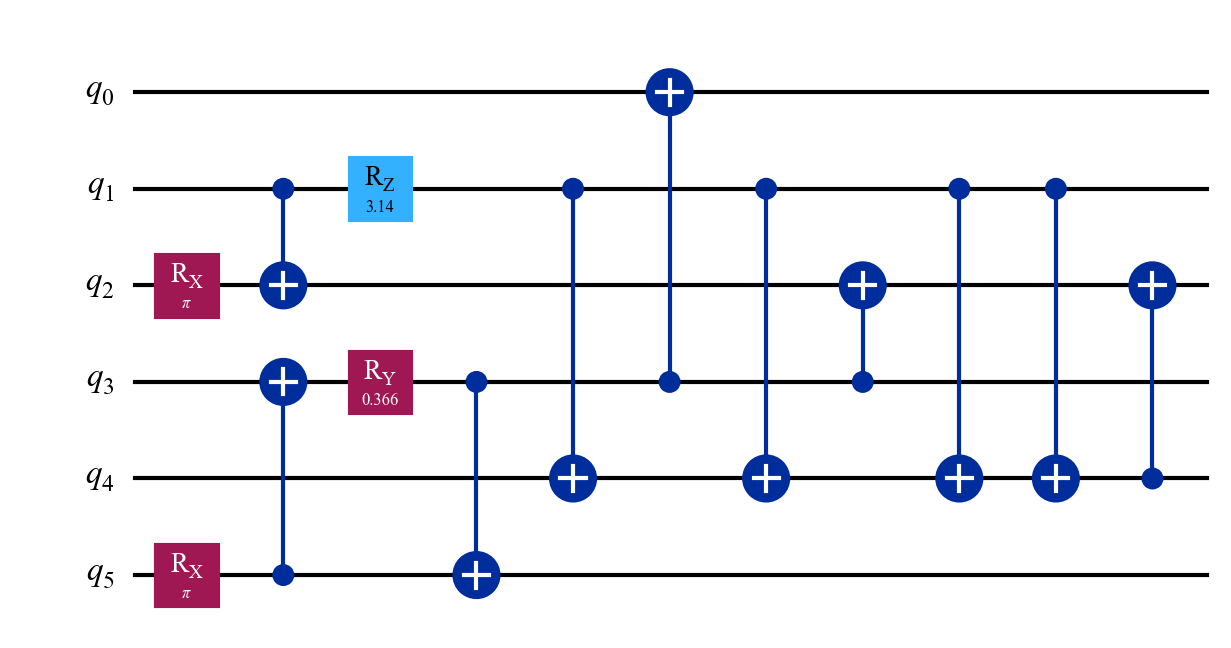

Session 9: Final energy -7.832536 Ha
-0.9821|001001> +0.1884|100100> 


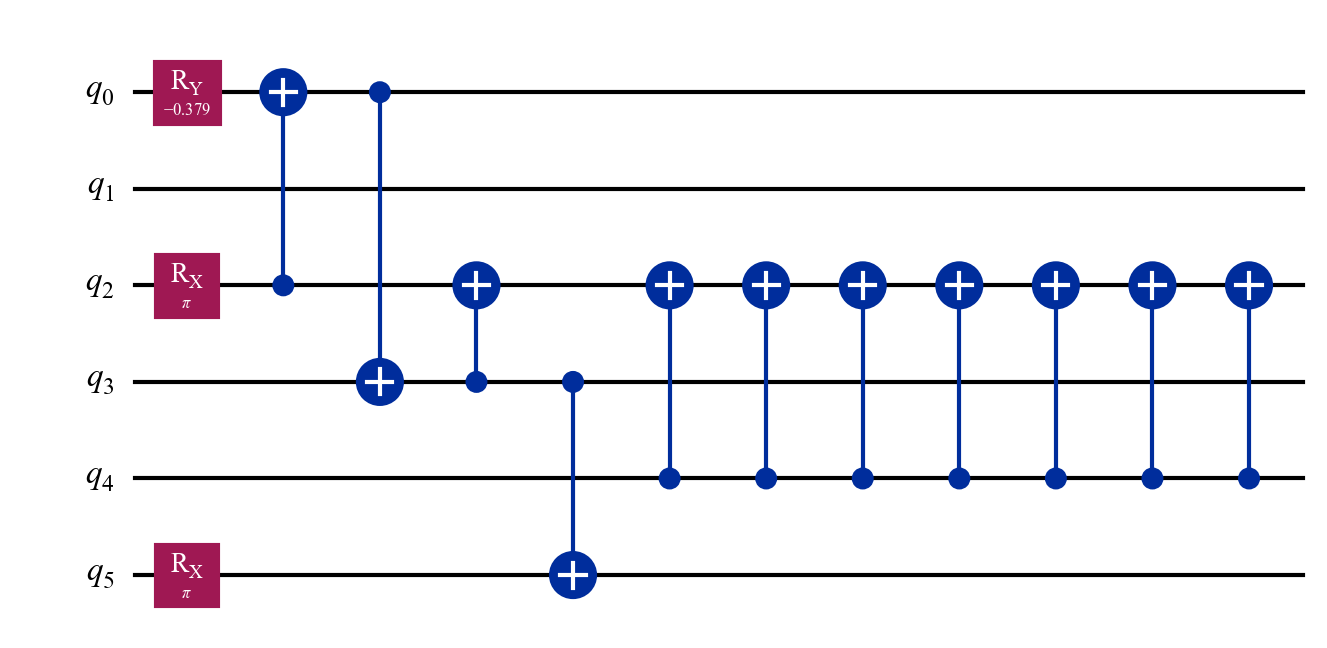

Session 10: Final energy -7.832540 Ha
+0.9836e^(-0.7262πi)|001001> +0.1803e^(+0.2738πi)|100100> 


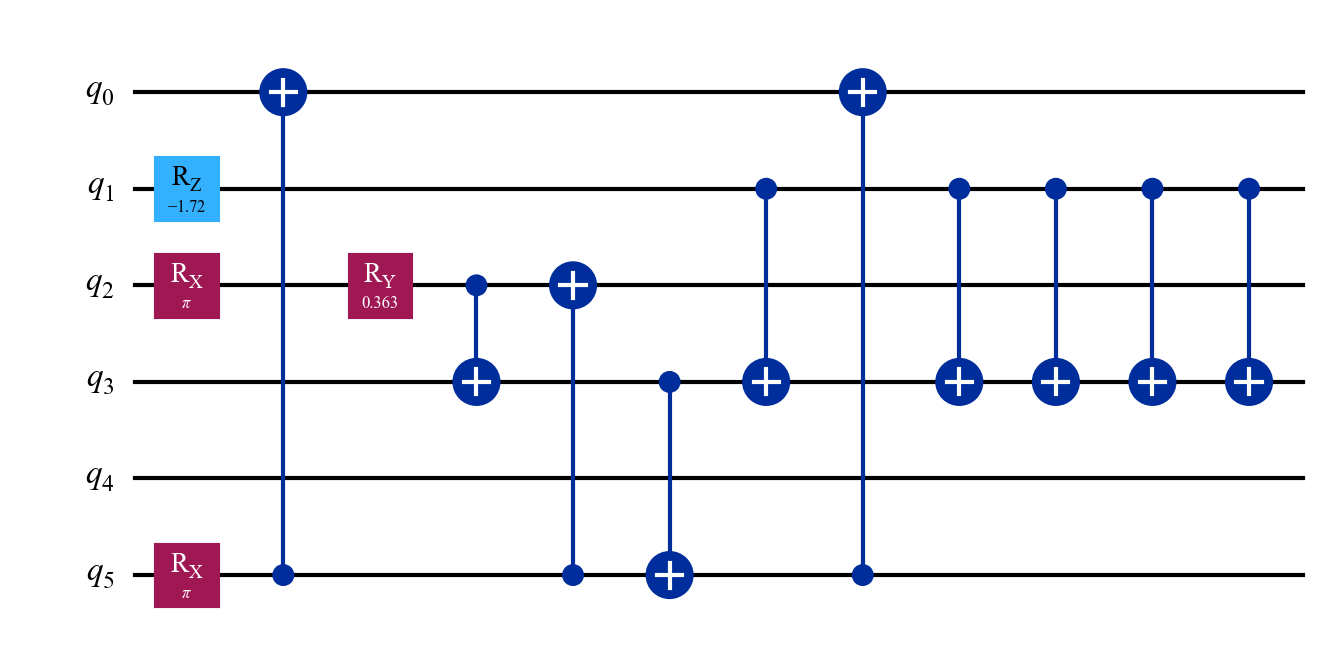

Session 11: Final energy -7.837084 Ha
-0.9778|001001> -0.0961|010100> +0.1853|100100> -0.0182|111001> 


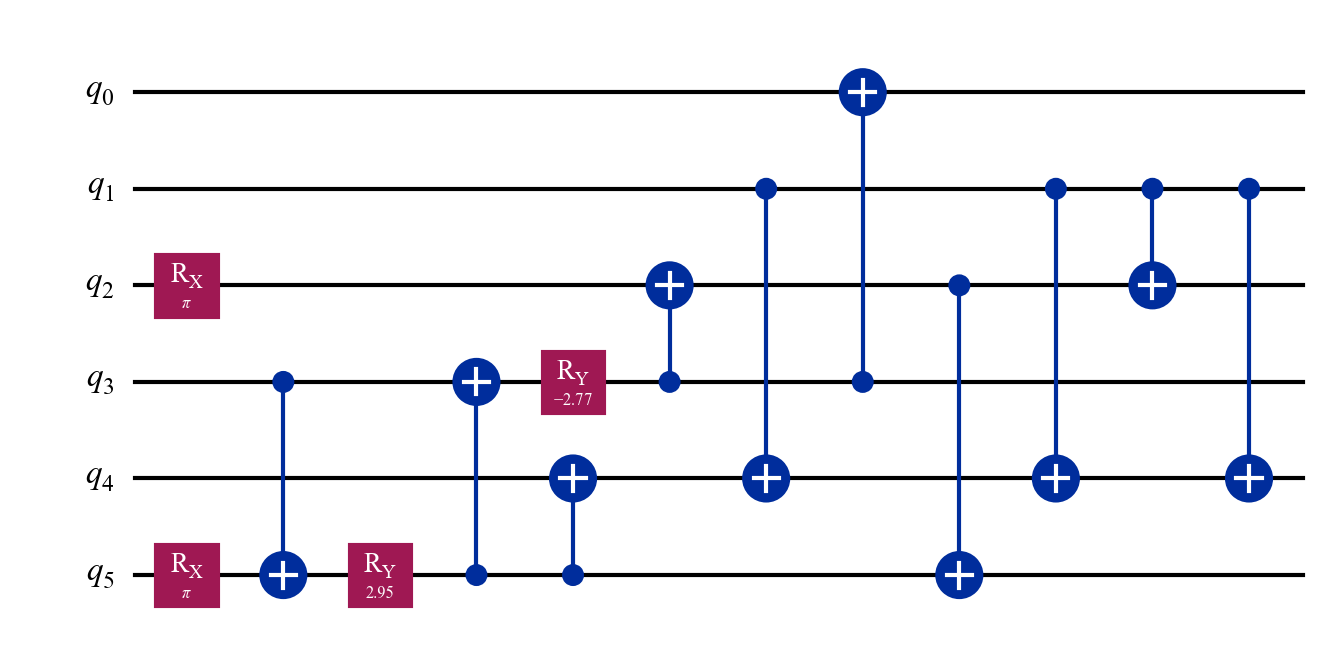

In [4]:
import numpy as np
from itertools import product
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from IPython.display import Image, display
import tequila as tq
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit.quantum_info import Statevector
from numpy import linalg as LA



def dictionary(num_qubits):
        #generate self.dictionary of actions 
        dictionary = dict()
        i = 0    
        #CNOT actions
        for c in range(num_qubits):
            for x in range(num_qubits):
                #no CNOT(0,0), CNOT(1,1),..
                if c!=x:
                    dictionary[i] =  [c, x, num_qubits, 0]
                    i += 1
        #Rotation gate actions
        for r, h in product(range(num_qubits),
                range(1, 4)):
            dictionary[i] = [num_qubits, 0, r, h]
            i += 1

        number_of_actions=i-1

        return dictionary  

#This function applies the chosen action (=gate) on the state:
def step(chosed_action,chosed_angle,current_qucircuit):
    if dictionary[chosed_action][0]==num_qubits and dictionary[chosed_action][2]==num_qubits:
        pass
    elif dictionary[chosed_action][0]!=num_qubits:
        current_qucircuit.cx(dictionary[chosed_action][0],dictionary[chosed_action][1])
        #print(f'current_qucircuit.cx({dictionary[chosed_action][0]},{dictionary[chosed_action][1]})')
    #Apply rotation-gate if third position of the action array does not equal num_qubit
    elif dictionary[chosed_action][2]!=num_qubits:
        #Which rotation axis? Build parametric circuit
        if dictionary[chosed_action][3]==1:
            current_qucircuit.rx(chosed_angle,dictionary[chosed_action][2])
            #print(f'current_qucircuit.rx({chosed_angle},{dictionary[chosed_action][2]})')
        elif dictionary[chosed_action][3]==2:
            current_qucircuit.ry(chosed_angle,dictionary[chosed_action][2])
            #print(f'current_qucircuit.ry({chosed_angle},{dictionary[chosed_action][2]})')
        elif dictionary[chosed_action][3]==3:
            current_qucircuit.rz(chosed_angle,dictionary[chosed_action][2])
            #print(f'current_qucircuit.rz({chosed_angle},{dictionary[chosed_action][2]})')
    return current_qucircuit
    
# --- Load Hamiltonian ---
num_qubits=6
H_data = np.load("molecule_data.npy", allow_pickle=True)
H = np.array([entry[0] for entry in H_data])
_, vv = LA.eigh(H[0])
ground_state = vv[:, 0]

# --- Build action dictionary ---
dictionary = dictionary(num_qubits)

# --- Analyse last learned circuit for each session ---
for session in range(12):
    results = np.load(f"training_session_{session}/results_{session}.npy", allow_pickle=True)
    energy = np.real(np.array(list(zip(*results))[1]))
    evaluation = np.array(list(zip(*results))[2], dtype=bool)
    circuit_data = np.array(list(zip(*results))[4])
    angle_data = np.array(list(zip(*results))[5])

    mask_true = np.where(evaluation)[0]
 
    idx = mask_true[-1]  # last evaluated circuit
    actions = circuit_data[idx]
    angles = -1 * angle_data[idx]  # invert angle sign as we used qulacs and here qiskit is used for visualization

    qc = QuantumCircuit(num_qubits)
    qc.rx(np.pi, 5)
    qc.rx(np.pi, 2)

    energy_change = []
    state = Statevector(qc).data
    energy_change.append(np.real(np.vdot(state, np.dot(H[0], state))))

    for k in range(len(actions)):
        qc = step(actions[k], angles[k], qc)
        state = Statevector(qc).data
        E = np.real(np.vdot(state, np.dot(H[0], state)))
        energy_change.append(E)

    print(f"Session {session}: Final energy {energy_change[-1]:.6f} Ha")

    wfn = tq.QubitWaveFunction(state)
    print(wfn)
    qc.draw(output='mpl', filename=f'circuit_{session}.png')
    display(Image(filename=f'circuit_{session}.png'))